In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [52]:
f=pd.read_csv('Data_mar.csv',low_memory=False)
test=pd.read_csv('Data_jan.csv')

In [53]:
df_col=pd.read_csv('features_coefficient6.csv')['feature'].to_list()

In [54]:
df_col=[]
check=[]
for x in f.columns:
    if f[x].isnull().sum() > 0:
        check.append([x,f[x].isnull().sum()])
    if f[x].isnull().sum() > 0 and f[x].isnull().sum()<60000:
        df_col.append(x)

----------------------------------Insight------------------------------------------

In [55]:
N_0_count=[]
N_0_Tot=0
temp=(f[f['是否离网']=='N']).drop(['离网日期'],axis=1)
for x in df_col:
    N_0_Tot+=temp[x].isnull().sum()
    N_0_count.append([x,temp[x].isnull().sum()])

In [56]:
Y_0_count=[]
Y_0_Tot=0
temp=(f[f['是否离网']=='Y']).drop(['离网日期'],axis=1)
for x in df_col:
    Y_0_Tot+=temp[x].isnull().sum()
    Y_0_count.append([x,temp[x].isnull().sum()])

In [57]:
Y_0_df=pd.DataFrame(Y_0_count).set_index(0).sort_index()
N_0_df=pd.DataFrame(N_0_count).set_index(0).sort_index()

(<AxesSubplot: xlabel='0'>, <AxesSubplot: xlabel='0'>)

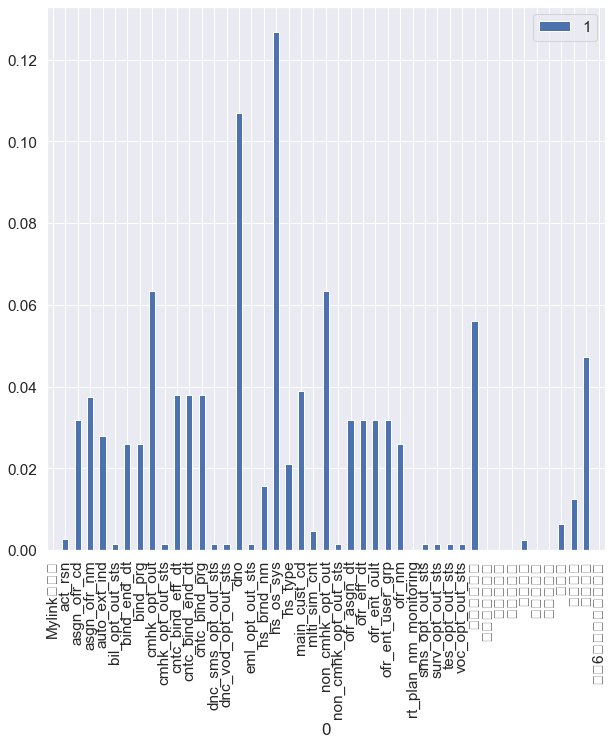

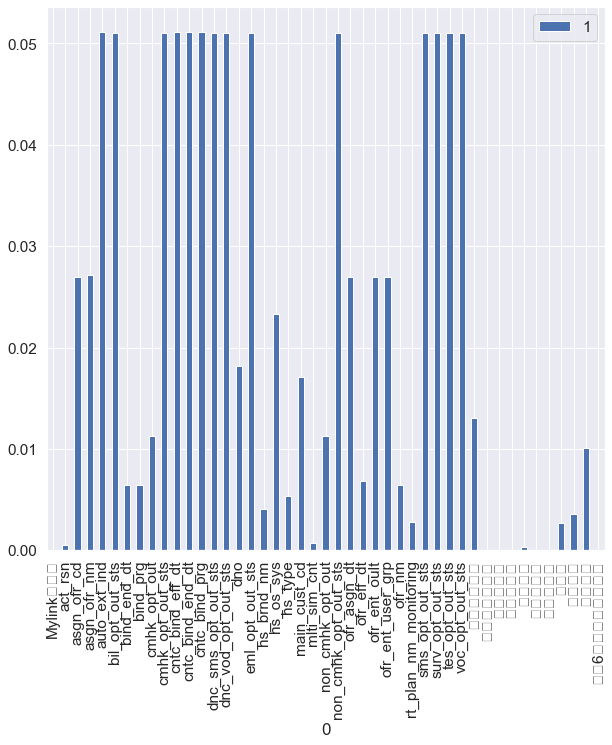

In [58]:
plt.rcParams["figure.figsize"] = [10, 10]
(N_0_df/N_0_Tot).plot.bar(), (Y_0_df/Y_0_Tot).plot.bar()

<AxesSubplot: xlabel='0'>

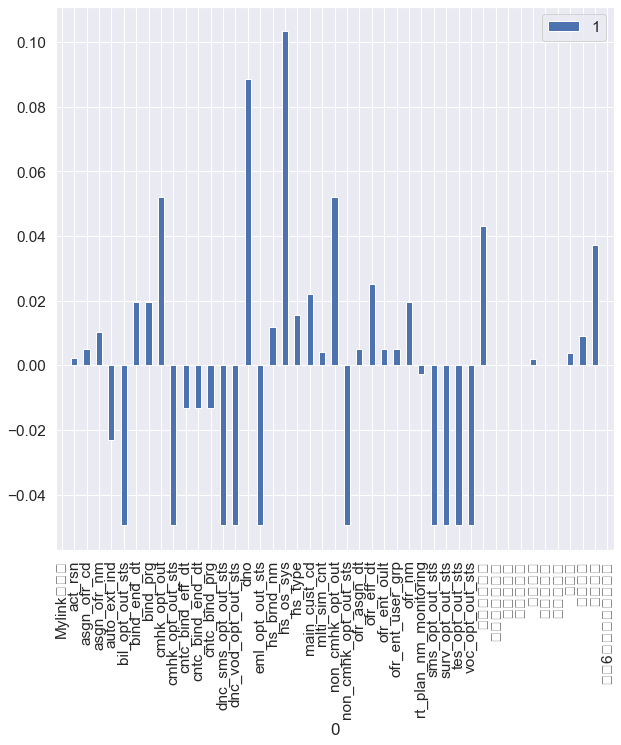

In [59]:
plt.rcParams["figure.figsize"] = [10, 10]
(N_0_df/N_0_Tot-Y_0_df/Y_0_Tot).plot.bar()

----------------------------------算法設計------------------------------------------

In [60]:
dec_mtx=(N_0_df/N_0_Tot-Y_0_df/Y_0_Tot).T[df_col].to_numpy()[0]

In [61]:
_0_count_test=[]
tt=test.drop(['离网日期'],axis=1)
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if pd.isna(row[x]):
            temp.append(1)
        else:
            temp.append(0)
    _0_count_test.append(temp)

In [62]:
test_array=np.array(_0_count_test)

In [63]:
y_pred=[]
for x in test_array:
    churn=dec_mtx.dot(x)
    if churn >=-0.05:
        y_pred.append(1)
    else:
        y_pred.append(-1)
y_pred=np.array(y_pred)

In [64]:
a=pd.get_dummies(test['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_test=b.to_frame('是否离网')

In [65]:
val=y_pred-y_test['是否离网'].to_numpy()
len(np.nonzero(val)[0])

366

In [66]:
sum(y_test['是否离网'].to_numpy()==-1)

8916

In [67]:
(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100

99.60318320792766

In [68]:
conf_list=[0,0,0,0]
for i in range(len(y_pred)):
    if y_test['是否离网'].to_numpy()[i]==-1:
        if val[i]==0:
            conf_list[0]+=1
        else:
            conf_list[1]+=1
    else:
        if val[i]==0:
            conf_list[3]+=1
        else:
            conf_list[2]+=1
np.set_printoptions(suppress=True)
conf_mrtx=np.array(conf_list)

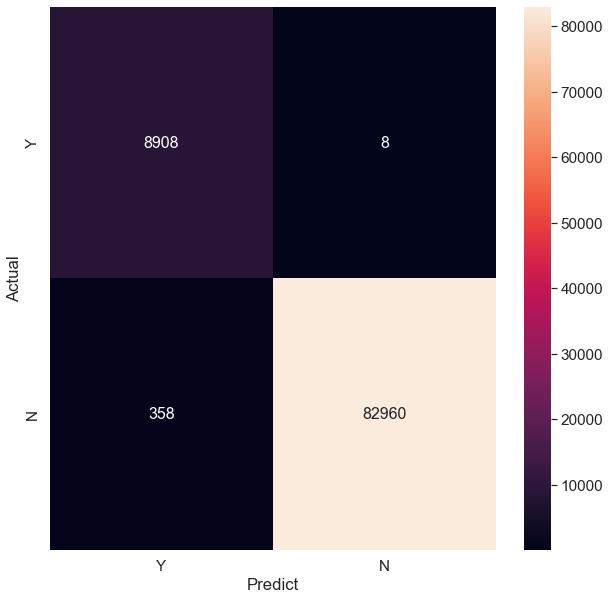

In [69]:
df_cm = pd.DataFrame(conf_mrtx.reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size
plt.xlabel('Predict')
plt.ylabel('Actual')
sn.set(font_scale=1.4) # for label size


plt.show()

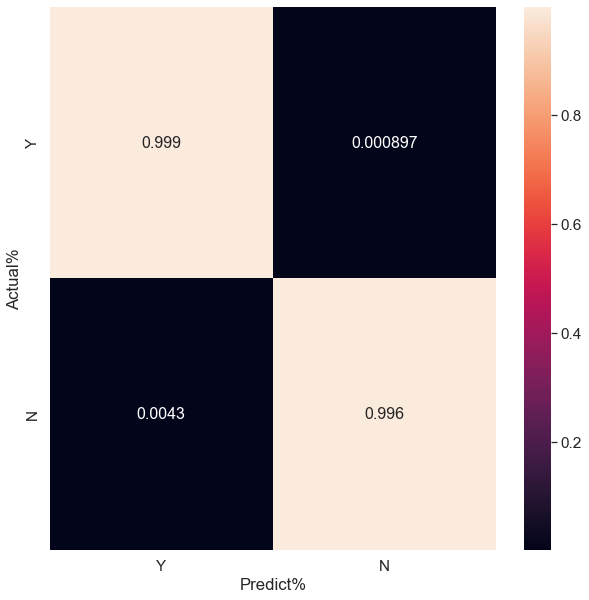

In [70]:
conf_prec=[conf_list[0]/sum(conf_list[0:2]),conf_list[1]/sum(conf_list[0:2]),conf_list[2]/sum(conf_list[2:]),conf_list[3]/sum(conf_list[2:])]
df_cm = pd.DataFrame(np.array(conf_prec).astype('float').reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.3g') # font size
plt.xlabel('Predict%')
plt.ylabel('Actual%')
sn.set(font_scale=1.4) # for label size